In [1]:
!pip install git+https://github.com/farm-gym/farm-gym
print("Successfully installed")


  Cloning https://github.com/farm-gym/farm-gym to c:\users\abdul\appdata\local\temp\pip-req-build-dlg059ig


  Running command git clone --filter=blob:none --quiet https://github.com/farm-gym/farm-gym 'C:\Users\abdul\AppData\Local\Temp\pip-req-build-dlg059ig'
  fatal: unable to access 'https://github.com/farm-gym/farm-gym/': Failed to connect to github.com port 443 after 2102 ms: Connection refused
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/farm-gym/farm-gym 'C:\Users\abdul\AppData\Local\Temp\pip-req-build-dlg059ig' did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/farm-gym/farm-gym 'C:\Users\abdul\AppData\Local\Temp\pip-req-build-dlg059ig' did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
# Initialise the environment and add wrappers

from farmgym_games.game_builder.utils_sb3 import farmgym_to_gym_observations_flattened, wrapper
from farmgym_games.game_catalogue.farm0.farm import env as Farm0
from stable_baselines3.common.monitor import Monitor

env = Farm0()
orignal_obs, _  = env.reset()
print(f"Original observation : \n{orignal_obs}\n")

# Wrap to change observation and action spaces and the step function
env.farmgym_to_gym_observations = farmgym_to_gym_observations_flattened
env = wrapper(env)
obs, _ = env.reset()
print(f"Wrapped observation : \n{obs}\n")

Original observation : 
[{'Free': {'Field-0': {'Weather-0': {'day#int365': 1}}}}, {'Free': {'Field-0': {'Weather-0': {'air_temperature': {'max#°C': [3.8], 'mean#°C': [1.1], 'min#°C': [-1.9]}}}}}, {'Free': {'Field-0': {'Weather-0': {'consecutive_dry#day': [1]}}}}, {'Free': {'Field-0': {'Soil-0': {'available_Water#L': {'[(0, 0)]': [125.0]}}}}}, {'Free': {'Field-0': {'Soil-0': {'microlife_health_index#%': {'[(0, 0)]': [75.0]}}}}}, {'Free': {'Field-0': {'Plant-0': {'stage': {'[(0, 0)]': 1}}}}}, {'Free': {'Field-0': {'Plant-0': {'population#nb': {'[(0, 0)]': [1.0]}}}}}, {'Free': {'Field-0': {'Plant-0': {'size#cm': {'[(0, 0)]': [0]}}}}}, {'Free': {'Field-0': {'Plant-0': {'fruits_per_plant#nb': {'[(0, 0)]': [0]}}}}}, {'Free': {'Field-0': {'Plant-0': {'fruit_weight#g': {'[(0, 0)]': [0]}}}}}, {'Free': {'Field-0': {'Pollinators-0': {'occurrence#bin': {'[(0, 0)]': 1}}}}}]

Wrapped observation : 
[1, 3.8, 1.1, -1.9, 1, 125.0, 75.0, 1, 1.0, 0, 0, 0, 0]



In [3]:
def expert_policy(obs):

    action = 0

    if obs[0] == 1:
        action = 6
    if obs[5] < 124:
        action = 1
    if obs[5] < 123:
        action = 2
    if obs[5] < 122:
        action = 3
    if obs[5] < 121:
        action = 4
    if obs[5] < 120:
        action = 5
    if obs[7] == 9:
        action = 7
    else:
        action = 6

    return action

In [45]:
def generate_harvest_list(eps):
    
    obs, _ = env.reset()

    harvest_list = []

    for _ in range (eps):
        done = False
        obs, _ = env.reset()
        #print(obs)

        while not done:
            action = expert_policy(obs)

            #print(obs)
            #print("Action: ", action)
            
            new_obs, reward, done, _, _ = env.step(action) 
            harvest = obs[11] * obs[10]
            
            obs = new_obs
        print(reward)
        #print("End")
        #print(obs)
        if(obs[7]==11):
            harvest_list.append(harvest)
            #print("Final yield: ", harvest)
        else:
            harvest_list.append(0)
            #print("Plant died")

    return harvest_list

In [46]:
harvest = generate_harvest_list(100)

922.1877064294831
930.027839815582
920.7652603248406
917.5574804092823
955.9517586762063
768.9889005534508
896.0990965898261
912.5869288111302
956.017992909887
824.9975075984468
974.9171280722244
946.8856848176197
220.81541562726113
973.7593302205833
911.4551840336055
950.8865089731942
906.0152085860678
893.6128013203174
929.1520813319544
306.53038363249317
925.0518562243706
815.9619397945742
935.721869947399
884.8360587191581
926.3271990572455
979.5930428210195
921.147596194285
879.4953099269794
884.345040827624
954.6513824815077
865.4118835765158
799.9027546815962
970.0414860704415
925.1304231806273
911.1465991022052
967.1374441007299
912.702417001593
911.3821808013244
758.2596930842632
927.4972162154032
923.5268046841617
279.8351998549521
925.5303923035746
868.792226608777
914.9559844116241
234.92535785607387
919.0901458975119
868.9728889387995
915.3200540883877
910.771292731724
924.4136341072294
915.2626637713502
915.2918554374857
809.8740803309832
300.30755273106854
906.5318451351

In [13]:
import numpy as np
import gym

# Function to generate offline data

def generate_offline_data(interactions):
    num_interactions = interactions

    if isinstance(env.action_space, gym.spaces.Box):
        expert_observations = np.empty((num_interactions,) + env.observation_space.shape)
        expert_actions = np.empty((num_interactions,) + (env.action_space.shape[0],))

    else:
        expert_observations = np.empty((num_interactions,) + env.observation_space.shape)
        expert_actions = np.empty((num_interactions,) + env.action_space.shape)

    obs, _ = env.reset()

    for i in range(num_interactions):
        action = expert_policy(obs)
        expert_observations[i] = obs
        expert_actions[i] = action
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        if done:
            obs, _ = env.reset()

    np.savez_compressed(
        "heuristic_data_{}".format(interactions),
        expert_actions=expert_actions,
        expert_observations=expert_observations,
    )

    return expert_observations, expert_actions

In [14]:
# Expert dataset

from torch.utils.data.dataset import Dataset, random_split

class ExpertDataSet(Dataset):
    def __init__(self, expert_observations, expert_actions):
        self.observations = expert_observations
        self.actions = expert_actions

    def __getitem__(self, index):
        return (self.observations[index], self.actions[index])

    def __len__(self):
        return len(self.observations)

100 Interactions

In [15]:
expert_observations, expert_actions = generate_offline_data(100)

expert_dataset = ExpertDataSet(expert_observations, expert_actions)

train_size = int(0.8 * len(expert_dataset))

test_size = len(expert_dataset) - train_size

train_expert_dataset, test_expert_dataset = random_split(
    expert_dataset, [train_size, test_size]
)

print("test_expert_dataset: ", len(test_expert_dataset))
print("train_expert_dataset: ", len(train_expert_dataset))

test_expert_dataset:  20
train_expert_dataset:  80


In [19]:
import torch as th
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

def pretrain_agent(student, batch_size=64, epochs=20, scheduler_gamma=0.7, learning_rate=0.001, log_interval=100, no_cuda=True, seed=1, test_batch_size=64):
    
    use_cuda = not no_cuda and th.cuda.is_available()
    th.manual_seed(seed)
    device = th.device("cuda" if use_cuda else "cpu")
    kwargs = {"num_workers": 1, "pin_memory": True} if use_cuda else {}

    if isinstance(env.action_space, gym.spaces.Box):
        criterion = nn.MSELoss()
    else:
        criterion = nn.CrossEntropyLoss()

    # Extract initial policy
    model = student.policy.to(device)

    def train(model, device, train_loader, optimizer):
        model.train()

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()

            if isinstance(env.action_space, gym.spaces.Box):
                # A2C/PPO policy outputs actions, values, log_prob
                # SAC/TD3 policy outputs actions only
                if isinstance(student, (PPO)):
                    action, _, _ = model(data)
                else:
                    # SAC/TD3:
                    action = model(data)
                action_prediction = action.double()
            else:
                # Retrieve the logits for A2C/PPO when using discrete actions
                dist = model.get_distribution(data)
                action_prediction = dist.distribution.logits
                target = target.long()

            loss = criterion(action_prediction, target)
            loss.backward()
            optimizer.step()
            if batch_idx % log_interval == 0:
                print(
                    "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                        epoch,
                        batch_idx * len(data),
                        len(train_loader.dataset),
                        100.0 * batch_idx / len(train_loader),
                        loss.item(),
                    )
                )

    def test(model, device, test_loader):
        model.eval()
        test_loss = 0
        with th.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)

                if isinstance(env.action_space, gym.spaces.Box):
                    # A2C/PPO policy outputs actions, values, log_prob
                    # SAC/TD3 policy outputs actions only
                    if isinstance(student, (PPO)):
                        action, _, _ = model(data)
                    else:
                        # SAC/TD3:
                        action = model(data)
                    action_prediction = action.double()
                else:
                    # Retrieve the logits for A2C/PPO when using discrete actions
                    dist = model.get_distribution(data)
                    action_prediction = dist.distribution.logits
                    target = target.long()

                test_loss = criterion(action_prediction, target)
        test_loss /= len(test_loader.dataset)
        print(f"Test set: Average loss: {test_loss:.4f}")

    # Here, we use PyTorch `DataLoader` to our load previously created `ExpertDataset` for training
    # and testing
    train_loader = th.utils.data.DataLoader(
        dataset=train_expert_dataset, batch_size=batch_size, shuffle=True, **kwargs
    )
    test_loader = th.utils.data.DataLoader(
        dataset=test_expert_dataset,
        batch_size=test_batch_size,
        shuffle=True,
        **kwargs,
    )

    # Define an Optimizer and a learning rate schedule.
    optimizer = optim.Adadelta(model.parameters(), lr=learning_rate)
    scheduler = StepLR(optimizer, step_size=1, gamma=scheduler_gamma)

    # Now we are finally ready to train the policy model.
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer)
        test(model, device, test_loader)
        scheduler.step()

    # Implant the trained policy network back into the RL student agent
    student.policy = model

In [18]:
# Create agent

from stable_baselines3 import PPO

ppo_student_100 = PPO("MlpPolicy", env, verbose=1, learning_rate=0.0001, n_epochs=15, tensorboard_log='pre_training_expert')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [20]:
# Pretrain on 100 experiences

pretrain_agent(ppo_student_100)
ppo_student_100.save("PPO_student_100")

Train Epoch: 1 [0/80 (0%)]	Loss: 2.079430
Test set: Average loss: 0.1040
Train Epoch: 2 [0/80 (0%)]	Loss: 2.079006
Test set: Average loss: 0.1040
Train Epoch: 3 [0/80 (0%)]	Loss: 2.078530
Test set: Average loss: 0.1040
Train Epoch: 4 [0/80 (0%)]	Loss: 2.078218
Test set: Average loss: 0.1040
Train Epoch: 5 [0/80 (0%)]	Loss: 2.078302
Test set: Average loss: 0.1040
Train Epoch: 6 [0/80 (0%)]	Loss: 2.078184
Test set: Average loss: 0.1040
Train Epoch: 7 [0/80 (0%)]	Loss: 2.078176
Test set: Average loss: 0.1040
Train Epoch: 8 [0/80 (0%)]	Loss: 2.078016
Test set: Average loss: 0.1040
Train Epoch: 9 [0/80 (0%)]	Loss: 2.078291
Test set: Average loss: 0.1040
Train Epoch: 10 [0/80 (0%)]	Loss: 2.078200
Test set: Average loss: 0.1040
Train Epoch: 11 [0/80 (0%)]	Loss: 2.078198
Test set: Average loss: 0.1040
Train Epoch: 12 [0/80 (0%)]	Loss: 2.078216
Test set: Average loss: 0.1040
Train Epoch: 13 [0/80 (0%)]	Loss: 2.077846
Test set: Average loss: 0.1040
Train Epoch: 14 [0/80 (0%)]	Loss: 2.077670
Test

In [22]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_100, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward = 20.73573426351184 +/- 44.11797726713561


1,000 Interactions

In [23]:
expert_observations, expert_actions = generate_offline_data(1000)

expert_dataset = ExpertDataSet(expert_observations, expert_actions)

train_size = int(0.8 * len(expert_dataset))

test_size = len(expert_dataset) - train_size

train_expert_dataset, test_expert_dataset = random_split(
    expert_dataset, [train_size, test_size]
)

print("test_expert_dataset: ", len(test_expert_dataset))
print("train_expert_dataset: ", len(train_expert_dataset))

test_expert_dataset:  200
train_expert_dataset:  800


In [28]:
# Create agent

ppo_student_1000 = PPO("MlpPolicy", env, verbose=1, learning_rate=0.0001, n_epochs=15, tensorboard_log='pre_training_expert')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [29]:
# Pretrain on 1000 experiences

pretrain_agent(ppo_student_1000, epochs=30)
ppo_student_1000.save("PPO_student_1000")

Train Epoch: 1 [0/800 (0%)]	Loss: 2.076627
Test set: Average loss: 0.0104
Train Epoch: 2 [0/800 (0%)]	Loss: 2.074362
Test set: Average loss: 0.0104
Train Epoch: 3 [0/800 (0%)]	Loss: 2.072180
Test set: Average loss: 0.0104
Train Epoch: 4 [0/800 (0%)]	Loss: 2.070813
Test set: Average loss: 0.0103
Train Epoch: 5 [0/800 (0%)]	Loss: 2.069004
Test set: Average loss: 0.0104
Train Epoch: 6 [0/800 (0%)]	Loss: 2.069407
Test set: Average loss: 0.0103
Train Epoch: 7 [0/800 (0%)]	Loss: 2.068387
Test set: Average loss: 0.0104
Train Epoch: 8 [0/800 (0%)]	Loss: 2.068213
Test set: Average loss: 0.0103
Train Epoch: 9 [0/800 (0%)]	Loss: 2.069346
Test set: Average loss: 0.0104
Train Epoch: 10 [0/800 (0%)]	Loss: 2.067610
Test set: Average loss: 0.0103
Train Epoch: 11 [0/800 (0%)]	Loss: 2.067008
Test set: Average loss: 0.0103
Train Epoch: 12 [0/800 (0%)]	Loss: 2.067729
Test set: Average loss: 0.0104
Train Epoch: 13 [0/800 (0%)]	Loss: 2.068326
Test set: Average loss: 0.0103
Train Epoch: 14 [0/800 (0%)]	Loss:

In [31]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_1000, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

Mean reward = 94.78658676572493 +/- 13.372424774494794


10,000 Interactions

In [32]:
expert_observations, expert_actions = generate_offline_data(10000)

expert_dataset = ExpertDataSet(expert_observations, expert_actions)

train_size = int(0.8 * len(expert_dataset))

test_size = len(expert_dataset) - train_size

train_expert_dataset, test_expert_dataset = random_split(
    expert_dataset, [train_size, test_size]
)

print("test_expert_dataset: ", len(test_expert_dataset))
print("train_expert_dataset: ", len(train_expert_dataset))

test_expert_dataset:  2000
train_expert_dataset:  8000


In [38]:
# Create agent

ppo_student_10000 = PPO("MlpPolicy", env, verbose=1, learning_rate=0.0001, n_epochs=15, tensorboard_log='pre_training_expert')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [39]:
# Pretrain on 10000 experiences

pretrain_agent(ppo_student_10000, epochs=40)
ppo_student_10000.save("PPO_student_10000")

Train Epoch: 1 [0/8000 (0%)]	Loss: 2.081575
Train Epoch: 1 [6400/8000 (80%)]	Loss: 2.057822
Test set: Average loss: 0.0010
Train Epoch: 2 [0/8000 (0%)]	Loss: 2.051247
Train Epoch: 2 [6400/8000 (80%)]	Loss: 2.028327
Test set: Average loss: 0.0010
Train Epoch: 3 [0/8000 (0%)]	Loss: 2.022662
Train Epoch: 3 [6400/8000 (80%)]	Loss: 2.004292
Test set: Average loss: 0.0010
Train Epoch: 4 [0/8000 (0%)]	Loss: 1.999424
Train Epoch: 4 [6400/8000 (80%)]	Loss: 1.983238
Test set: Average loss: 0.0010
Train Epoch: 5 [0/8000 (0%)]	Loss: 1.980916
Train Epoch: 5 [6400/8000 (80%)]	Loss: 1.966449
Test set: Average loss: 0.0010
Train Epoch: 6 [0/8000 (0%)]	Loss: 1.966649
Train Epoch: 6 [6400/8000 (80%)]	Loss: 1.956542
Test set: Average loss: 0.0010
Train Epoch: 7 [0/8000 (0%)]	Loss: 1.953109
Train Epoch: 7 [6400/8000 (80%)]	Loss: 1.945791
Test set: Average loss: 0.0010
Train Epoch: 8 [0/8000 (0%)]	Loss: 1.947339
Train Epoch: 8 [6400/8000 (80%)]	Loss: 1.941369
Test set: Average loss: 0.0010
Train Epoch: 9 [

In [40]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_10000, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

Mean reward = 98.88443987854757 +/- 14.942906867074695


100,000 Interactions

In [41]:
expert_observations, expert_actions = generate_offline_data(100000)

expert_dataset = ExpertDataSet(expert_observations, expert_actions)

train_size = int(0.8 * len(expert_dataset))

test_size = len(expert_dataset) - train_size

train_expert_dataset, test_expert_dataset = random_split(
    expert_dataset, [train_size, test_size]
)

print("test_expert_dataset: ", len(test_expert_dataset))
print("train_expert_dataset: ", len(train_expert_dataset))

test_expert_dataset:  20000
train_expert_dataset:  80000


In [42]:
# Create agent

ppo_student_100000 = PPO("MlpPolicy", env, verbose=1, learning_rate=0.0001, n_epochs=15, tensorboard_log='pre_training_expert')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [43]:
# Pretrain on 10000 experiences

pretrain_agent(ppo_student_100000, epochs=50)
ppo_student_100000.save("PPO_student_100000")

Train Epoch: 1 [0/80000 (0%)]	Loss: 2.083156
Train Epoch: 1 [6400/80000 (8%)]	Loss: 2.057541
Train Epoch: 1 [12800/80000 (16%)]	Loss: 2.025238
Train Epoch: 1 [19200/80000 (24%)]	Loss: 1.986523
Train Epoch: 1 [25600/80000 (32%)]	Loss: 1.948214
Train Epoch: 1 [32000/80000 (40%)]	Loss: 1.891156
Train Epoch: 1 [38400/80000 (48%)]	Loss: 1.835210
Train Epoch: 1 [44800/80000 (56%)]	Loss: 1.779716
Train Epoch: 1 [51200/80000 (64%)]	Loss: 1.713184
Train Epoch: 1 [57600/80000 (72%)]	Loss: 1.651222
Train Epoch: 1 [64000/80000 (80%)]	Loss: 1.582407
Train Epoch: 1 [70400/80000 (88%)]	Loss: 1.499541
Train Epoch: 1 [76800/80000 (96%)]	Loss: 1.428500
Test set: Average loss: 0.0001
Train Epoch: 2 [0/80000 (0%)]	Loss: 1.377259
Train Epoch: 2 [6400/80000 (8%)]	Loss: 1.345815
Train Epoch: 2 [12800/80000 (16%)]	Loss: 1.273169
Train Epoch: 2 [19200/80000 (24%)]	Loss: 1.207946
Train Epoch: 2 [25600/80000 (32%)]	Loss: 1.158946
Train Epoch: 2 [32000/80000 (40%)]	Loss: 1.091316
Train Epoch: 2 [38400/80000 (48%)

In [44]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_100000, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

Mean reward = 99.3653668918577 +/- 13.725224316303912


1M Interactions

In [54]:
expert_observations, expert_actions = generate_offline_data(1000000)

expert_dataset = ExpertDataSet(expert_observations, expert_actions)

train_size = int(0.8 * len(expert_dataset))

test_size = len(expert_dataset) - train_size

train_expert_dataset, test_expert_dataset = random_split(
    expert_dataset, [train_size, test_size]
)

print("test_expert_dataset: ", len(test_expert_dataset))
print("train_expert_dataset: ", len(train_expert_dataset))

test_expert_dataset:  200000
train_expert_dataset:  800000


In [55]:
# Create agent

ppo_student_1000000 = PPO("MlpPolicy", env, verbose=1, learning_rate=0.0001, n_epochs=15, tensorboard_log='pre_training_expert')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [56]:
# Pretrain on 10000 experiences

pretrain_agent(ppo_student_1000000, epochs=50)
ppo_student_1000000.save("PPO_student_1000000")

Train Epoch: 1 [0/800000 (0%)]	Loss: 2.081413
Train Epoch: 1 [6400/800000 (1%)]	Loss: 2.060526
Train Epoch: 1 [12800/800000 (2%)]	Loss: 2.028437
Train Epoch: 1 [19200/800000 (2%)]	Loss: 1.991730
Train Epoch: 1 [25600/800000 (3%)]	Loss: 1.952149
Train Epoch: 1 [32000/800000 (4%)]	Loss: 1.903749
Train Epoch: 1 [38400/800000 (5%)]	Loss: 1.855130
Train Epoch: 1 [44800/800000 (6%)]	Loss: 1.808055
Train Epoch: 1 [51200/800000 (6%)]	Loss: 1.749422
Train Epoch: 1 [57600/800000 (7%)]	Loss: 1.694060
Train Epoch: 1 [64000/800000 (8%)]	Loss: 1.620237
Train Epoch: 1 [70400/800000 (9%)]	Loss: 1.551809
Train Epoch: 1 [76800/800000 (10%)]	Loss: 1.472153
Train Epoch: 1 [83200/800000 (10%)]	Loss: 1.393815
Train Epoch: 1 [89600/800000 (11%)]	Loss: 1.323424
Train Epoch: 1 [96000/800000 (12%)]	Loss: 1.238362
Train Epoch: 1 [102400/800000 (13%)]	Loss: 1.174898
Train Epoch: 1 [108800/800000 (14%)]	Loss: 1.108717
Train Epoch: 1 [115200/800000 (14%)]	Loss: 1.020434
Train Epoch: 1 [121600/800000 (15%)]	Loss: 0.

In [58]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_1000000, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

Mean reward = 100.41240371809806 +/- 13.517792006208133


Harvesting with the models

In [47]:
def generate_harvest_list_with_models(model):
    
    obs, _ = env.reset()

    harvest_list = []

    for _ in range (100):
        done = False
        obs, _ = env.reset()
        #print(obs)

        while not done:
            action, _ = model.predict(obs)

            #print(obs)
            #print("Action: ", action)
            
            new_obs, reward, done, _, _ = env.step(action) 
            harvest = obs[11] * obs[10]
            
            obs = new_obs
        #print(reward)
        #print("End")
        #print(obs)
        if(obs[7]==11):
            harvest_list.append(harvest)
            #print("Final yield: ", harvest)
        else:
            harvest_list.append(0)
            #print("Plant died")

    return harvest_list

In [59]:
import statistics

list1 = generate_harvest_list_with_models(ppo_student_100)
list2 = generate_harvest_list_with_models(ppo_student_1000)
list3 = generate_harvest_list_with_models(ppo_student_10000)
list4 = generate_harvest_list_with_models(ppo_student_100000)
list5 = generate_harvest_list_with_models(ppo_student_1000000)

print("100 samples pretraining: {} +/- {}".format(statistics.mean(list1), statistics.stdev(list1)))
print("1000 samples pretraining: {} +/- {}".format(statistics.mean(list2), statistics.stdev(list2)))
print("10000 samples pretraining: {} +/- {}".format(statistics.mean(list3), statistics.stdev(list3)))
print("100000 samples pretraining: {} +/- {}".format(statistics.mean(list4), statistics.stdev(list4)))
print("1000000 samples pretraining: {} +/- {}".format(statistics.mean(list5), statistics.stdev(list5)))

100 samples pretraining: 2.689492100819732 +/- 12.384337312876422
1000 samples pretraining: 2.0377343461913267 +/- 8.613473196411206
10000 samples pretraining: 1.4143086429877476 +/- 10.03425319791201
100000 samples pretraining: 282.1363240422292 +/- 349.0547201050249
1000000 samples pretraining: 129.97652431539316 +/- 274.485556158025


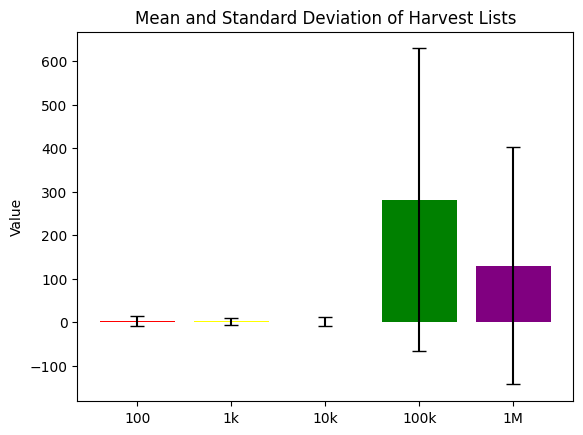

In [62]:
import matplotlib.pyplot as plt
import numpy as np


# Calculate mean and standard deviation
mean = np.mean(list1)
std_dev = np.std(list1)

# Creating the bar chart
plt.bar('100', np.mean(list1), yerr=np.std(list1), capsize=5, color='red', ecolor='black')
plt.bar('1k', np.mean(list2), yerr=np.std(list2), capsize=5, color='yellow', ecolor='black')
plt.bar('10k', np.mean(list3), yerr=np.std(list3), capsize=5, color='blue', ecolor='black')
plt.bar('100k', np.mean(list4), yerr=np.std(list4), capsize=5, color='green', ecolor='black')
plt.bar('1M', np.mean(list5), yerr=np.std(list5), capsize=5, color='purple', ecolor='black')

# Adding title and labels
plt.title('Mean and Standard Deviation of Harvest Lists')
plt.ylabel('Value')

# Display the plot
plt.show()

Train all 5 agents using RL

100K experiences agent

In [63]:
ppo_student_100000.learn(total_timesteps=500000)

Logging to pre_training_expert\PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 194      |
|    ep_rew_mean     | 400      |
| time/              |          |
|    fps             | 222      |
|    iterations      | 1        |
|    time_elapsed    | 9        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 189          |
|    ep_rew_mean          | 329          |
| time/                   |              |
|    fps                  | 239          |
|    iterations           | 2            |
|    time_elapsed         | 17           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0010738112 |
|    clip_fraction        | 0.00931      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.357       |
|    explained_varian

In [64]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_100000, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward = 311.7285288013448 +/- 376.0783256259037


In [65]:
harvest_100k = generate_harvest_list_with_models(ppo_student_100000)

print("Harvest list for PPO_100k: {} +/- {}".format(statistics.mean(harvest_100k), statistics.stdev(harvest_100k)))

Harvest list for PPO_100k: 593.7662885354131 +/- 355.35220327068043


100 experiences agent

In [67]:
ppo_student_100.learn(total_timesteps=500000)

Logging to pre_training_expert\PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 36.4     |
|    ep_rew_mean     | 20       |
| time/              |          |
|    fps             | 451      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.4        |
|    ep_rew_mean          | 13.4        |
| time/                   |             |
|    fps                  | 369         |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014608946 |
|    clip_fraction        | 0.0692      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.07       |
|    explained_variance   | 0.0048 

In [69]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_100, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

Mean reward = 97.29499193029828 +/- 14.821193264617744


In [75]:
harvest_100 = generate_harvest_list_with_models(ppo_student_100)

print("Harvest list for PPO_100: {} +/- {}".format(statistics.mean(harvest_100), statistics.stdev(harvest_100)))

Harvest list for PPO_100: 459.2239132410409 +/- 225.44609975700985


1k experiences agent

In [72]:
ppo_student_1000.learn(total_timesteps=500000)

Logging to pre_training_expert\PPO_3
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 34.9     |
|    ep_rew_mean     | 17.4     |
| time/              |          |
|    fps             | 438      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40.8        |
|    ep_rew_mean          | 19.9        |
| time/                   |             |
|    fps                  | 384         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016497968 |
|    clip_fraction        | 0.0538      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.07       |
|    explained_variance   | 0.0179 

In [73]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_1000, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward = 99.21244071581982 +/- 18.096470249509427


In [74]:
harvest_1000 = generate_harvest_list_with_models(ppo_student_1000)

print("Harvest list for PPO_1k: {} +/- {}".format(statistics.mean(harvest_1000), statistics.stdev(harvest_1000)))

Harvest list for PPO_1k: 271.38004079473484 +/- 203.905243203957


10k experiences agent

In [76]:
ppo_student_10000.learn(total_timesteps=500000)

Logging to pre_training_expert\PPO_4
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 35.9     |
|    ep_rew_mean     | 17.8     |
| time/              |          |
|    fps             | 303      |
|    iterations      | 1        |
|    time_elapsed    | 6        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 28.5        |
|    ep_rew_mean          | 15.4        |
| time/                   |             |
|    fps                  | 287         |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010246506 |
|    clip_fraction        | 0.022       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.07       |
|    explained_variance   | -0.007 

In [78]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_10000, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward = 632.1636553738045 +/- 434.21888675235306


In [77]:
harvest_10000 = generate_harvest_list_with_models(ppo_student_10000)

print("Harvest list for PPO_10k: {} +/- {}".format(statistics.mean(harvest_10000), statistics.stdev(harvest_10000)))

Harvest list for PPO_10k: 619.9252813521517 +/- 281.29122501126926


1M experiences

In [80]:
ppo_student_1000000.learn(total_timesteps=500000)

Logging to pre_training_expert\PPO_5
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 225      |
|    ep_rew_mean     | 191      |
| time/              |          |
|    fps             | 418      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 217           |
|    ep_rew_mean          | 334           |
| time/                   |               |
|    fps                  | 347           |
|    iterations           | 2             |
|    time_elapsed         | 11            |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00012240143 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0392       |
|    ex

In [81]:
# Evaluate

from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(ppo_student_1000000, env, n_eval_episodes=100)

print(f"Mean reward = {mean_reward} +/- {std_reward}")

Mean reward = 604.9574617461348 +/- 403.5343969324408


In [82]:
harvest_1000000 = generate_harvest_list_with_models(ppo_student_1000000)

print("Harvest list for PPO_10k: {} +/- {}".format(statistics.mean(harvest_1000000), statistics.stdev(harvest_1000000)))

Harvest list for PPO_10k: 606.2707615474399 +/- 334.5123288297304


In [83]:
%launch tensorboard

UsageError: Line magic function `%launch` not found.


In [84]:
%load_ext tensorboard

%tensorboard --logdir "pre_training_expert_corrected_names"